In [1]:
import pandas as pd

data = pd.read_csv('total2.csv')
data.head()

,Unnamed: 0,velocity,acceleration,trajectory_id,subfolder,labels,v_ave,v_med,v_max,v_std,a_ave,a_med,a_max,a_std
0,0,16.108078,-0.588742,20080509043509,89,car,8.79689,8.688512,21.7058,5.419097,-0.031366,-0.032979,1.211086,0.426994
1,1,15.519336,-0.419958,20080509043509,89,car,8.79689,8.688512,21.7058,5.419097,-0.031366,-0.032979,1.211086,0.426994
2,2,14.679420,-0.007034,20080509043509,89,car,8.79689,8.688512,21.7058,5.419097,-0.031366,-0.032979,1.211086,0.426994
3,3,14.665352,0.320263,20080509043509,89,car,8.79689,8.688512,21.7058,5.419097,-0.031366,-0.032979,1.211086,0.426994
4,4,15.305877,0.604292,20080509043509,89,car,8.79689,8.688512,21.7058,5.419097,-0.031366,-0.032979,1.211086,0.426994


In [2]:
IMPORTING_COLUMNS = ['velocity', 'acceleration', 'trajectory_id', 'subfolder',
                     'labels', 'v_ave', 'v_med', 'v_max', 'a_ave', 'a_med', 'a_max']


try:
    IMPORTING_COLUMNS.remove('labels')
    IMPORTING_COLUMNS.remove('subfolder')
except ValueError:
    pass

X = data[IMPORTING_COLUMNS]
Y = data['labels']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9, random_state=123)

In [4]:
from sklearn.ensemble import RandomForestClassifier

import time

In [5]:
rf_classifier = RandomForestClassifier(n_estimators = 18, n_jobs=-1)

#Random Forest
t_start = time.clock()
rf_classifier.fit(X_train, y_train)
t_end = time.clock()
t_diff = t_end - t_start

train_score = rf_classifier.score(X_train, y_train)
test_score = rf_classifier.score(X_test, y_test)
y_pred_rf= rf_classifier.predict(X_test)
print("trained Random Forest in {:.2f} s.\t Score on training / test set: {} / {}".format(t_diff, train_score, test_score))


trained Random Forest in 64.62 s.	 Score on training / test set: 0.9953014478690534 / 0.8748989217372882


In [6]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


Feature ranking:
1. feature 0 (0.222069)
2. feature 3 (0.201430)
3. feature 4 (0.157767)
4. feature 1 (0.097060)
5. feature 6 (0.069912)
6. feature 2 (0.067066)
7. feature 7 (0.065127)
8. feature 8 (0.063142)
9. feature 5 (0.056427)


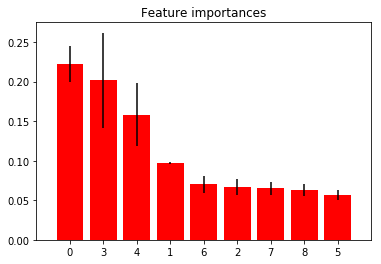

In [7]:
#  Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [8]:
X_train.head()

,velocity,acceleration,trajectory_id,v_ave,v_med,v_max,a_ave,a_med,a_max
3693069,7.687820,0.357223,20080512233207,8.565876,7.687820,26.601064,-0.005041,0.000000e+00,2.349480
1184948,7.961655,-0.250144,20081225022806,3.106162,1.514112,118.189649,0.006040,-1.492856e-08,55.639499
4440313,0.660675,-0.224081,20081116021909,10.979419,11.728394,20.785554,0.024282,5.359578e-03,1.528305
1296943,3.776133,0.335687,20080701013935,4.231021,4.322626,21.437424,-0.019565,-3.753814e-03,13.060301
2622054,7.979223,-0.031111,20080622040107,3.884429,1.728874,33.413808,-0.015515,-2.050380e-04,6.326346


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  6001      0      0    197    159      0      0     47    210    246
     572]
 [     0 609556      0  25740   1538      0    133    632   1026    445
   20414]
 [     0      0   2077     95      0      0      0      0     21      0
     774]
 [   330  25046    283 884670   5966      0      0   7810  12242   7528
  115453]
 [    85   1577      0   5191 426587      0     50    761   4002   2448
    8885]
 [     0      0      0      0      0     96      0      0    122      0
      16]
 [     0    117      0      0     16      0    808      0    567      0
      30]
 [    22    295      0   4984    525      0      0 185364   3663   3813
    9145]
 [   117    832      9   8512   3515    170    597   5206 135837   8325
   11656]
 [   493    425      0  10099   3166      0      0   4684  10617 477485
    3228]
 [  1165  18969    842 119831  11046     38    192  12692  14968   4487
  971813]]
Normalized confusion matrix
[[8.07e-01 0.00e+00 0.00e+00 

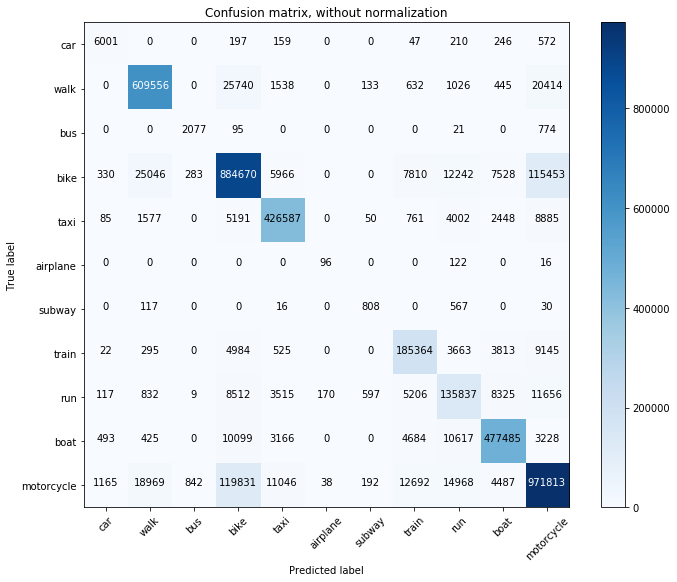

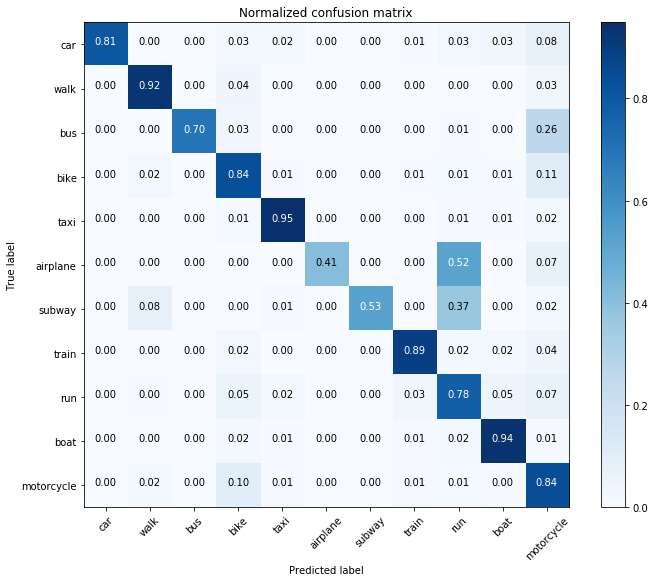

In [10]:
from sklearn.metrics import confusion_matrix
import itertools


class_names = list(data['labels'].unique())

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_pred_rf, y_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [11]:
# total car drivers
IMPORTING_COLUMNS = ['velocity', 'acceleration', 'trajectory_id', 'subfolder',
                     'labels', 'v_ave', 'v_med', 'v_max', 'a_ave', 'a_med', 'a_max']


try:
    IMPORTING_COLUMNS.remove('labels')
    IMPORTING_COLUMNS.remove('subfolder')
except ValueError:
    pass

X = data[IMPORTING_COLUMNS]
Y = data['subfolder']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=123)

In [13]:
rf_classifier = RandomForestClassifier(n_estimators = 18, n_jobs=-1)

#Random Forest
t_start = time.clock()
rf_classifier.fit(X_train, y_train)
t_end = time.clock()
t_diff = t_end - t_start

train_score = rf_classifier.score(X_train, y_train)
test_score = rf_classifier.score(X_test, y_test)
y_pred_rf= rf_classifier.predict(X_test)
print("trained Random Forest in {:.2f} s.\t Score on training / test set: {} / {}".format(t_diff, train_score, test_score))


trained Random Forest in 235.82 s.	 Score on training / test set: 0.9879096154200815 / 0.9536778810346767


In [14]:
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 2 (0.246197)
2. feature 3 (0.163564)
3. feature 4 (0.136474)
4. feature 6 (0.129459)
5. feature 8 (0.102566)
6. feature 5 (0.093944)
7. feature 7 (0.090369)
8. feature 0 (0.021304)
9. feature 1 (0.016121)


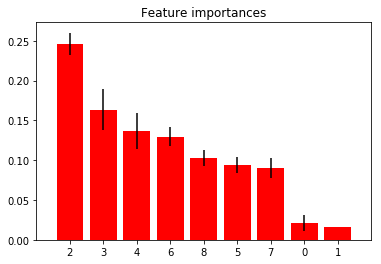

In [15]:
#  Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [16]:
# total car drivers
IMPORTING_COLUMNS = ['velocity', 'acceleration', 'trajectory_id', 'subfolder',
                     'labels', 'v_ave', 'v_med', 'v_max', 'a_ave', 'a_med', 'a_max']


try:
    IMPORTING_COLUMNS.remove('labels')
    IMPORTING_COLUMNS.remove('subfolder')
    IMPORTING_COLUMNS.remove('trajectory_id')
except ValueError:
    pass

X = data[IMPORTING_COLUMNS]
Y = data['subfolder']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=123)

In [18]:
rf_classifier = RandomForestClassifier(n_estimators = 18, n_jobs=-1)

#Random Forest
t_start = time.clock()
rf_classifier.fit(X_train, y_train)
t_end = time.clock()
t_diff = t_end - t_start

train_score = rf_classifier.score(X_train, y_train)
test_score = rf_classifier.score(X_test, y_test)
y_pred_rf= rf_classifier.predict(X_test)
print("trained Random Forest in {:.2f} s.\t Score on training / test set: {} / {}".format(t_diff, train_score, test_score))


trained Random Forest in 279.17 s.	 Score on training / test set: 0.9845759845424691 / 0.9502950244307963


In [19]:
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 3 (0.188171)
2. feature 2 (0.186842)
3. feature 5 (0.168378)
4. feature 7 (0.149527)
5. feature 4 (0.147231)
6. feature 6 (0.117102)
7. feature 0 (0.027142)
8. feature 1 (0.015606)


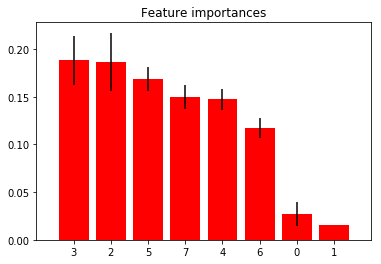

In [20]:
#  Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [21]:
X.head()

,velocity,acceleration,v_ave,v_med,v_max,a_ave,a_med,a_max
0,16.108078,-0.588742,8.79689,8.688512,21.7058,-0.031366,-0.032979,1.211086
1,15.519336,-0.419958,8.79689,8.688512,21.7058,-0.031366,-0.032979,1.211086
2,14.679420,-0.007034,8.79689,8.688512,21.7058,-0.031366,-0.032979,1.211086
3,14.665352,0.320263,8.79689,8.688512,21.7058,-0.031366,-0.032979,1.211086
4,15.305877,0.604292,8.79689,8.688512,21.7058,-0.031366,-0.032979,1.211086


In [22]:
data_car = data[data['labels'] == 'car']

In [23]:
# total car drivers
IMPORTING_COLUMNS = ['velocity', 'acceleration', 'trajectory_id', 'subfolder',
                     'labels', 'v_ave', 'v_med', 'v_max', 'a_ave', 'a_med', 'a_max']


try:
    IMPORTING_COLUMNS.remove('labels')
    IMPORTING_COLUMNS.remove('subfolder')
    IMPORTING_COLUMNS.remove('trajectory_id')
except ValueError:
    pass

X = data_car[IMPORTING_COLUMNS]
Y = data_car['subfolder']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [25]:
rf_classifier = RandomForestClassifier(n_estimators = 18, n_jobs=-1)

#Random Forest
t_start = time.clock()
rf_classifier.fit(X_train, y_train)
t_end = time.clock()
t_diff = t_end - t_start

train_score = rf_classifier.score(X_train, y_train)
test_score = rf_classifier.score(X_test, y_test)
y_pred_rf= rf_classifier.predict(X_test)
print("trained Random Forest in {:.2f} s.\t Score on training / test set: {} / {}".format(t_diff, train_score, test_score))


trained Random Forest in 27.59 s.	 Score on training / test set: 0.9673378398887377 / 0.9282373313164285


In [26]:
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 5 (0.258592)
2. feature 4 (0.174382)
3. feature 7 (0.149204)
4. feature 3 (0.135760)
5. feature 6 (0.124848)
6. feature 2 (0.123189)
7. feature 0 (0.019570)
8. feature 1 (0.014455)


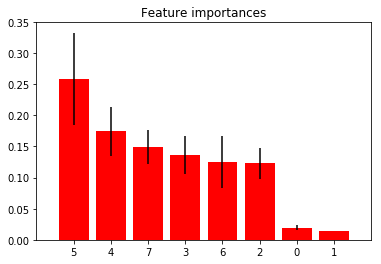

In [27]:
#  Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Confusion matrix, without normalization
[[ 488    0    0 ...    0    0    0]
 [   0  901    0 ...    0    0    0]
 [   0    0  211 ...    0    0    0]
 ...
 [   0    0    0 ... 1917    0    0]
 [   0    0    0 ...    0 1539    0]
 [   0    0    0 ...    0    0   32]]
Normalized confusion matrix
[[1.   0.   0.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.41 0.  ]
 [0.   0.   0.   ... 0.   0.   1.  ]]


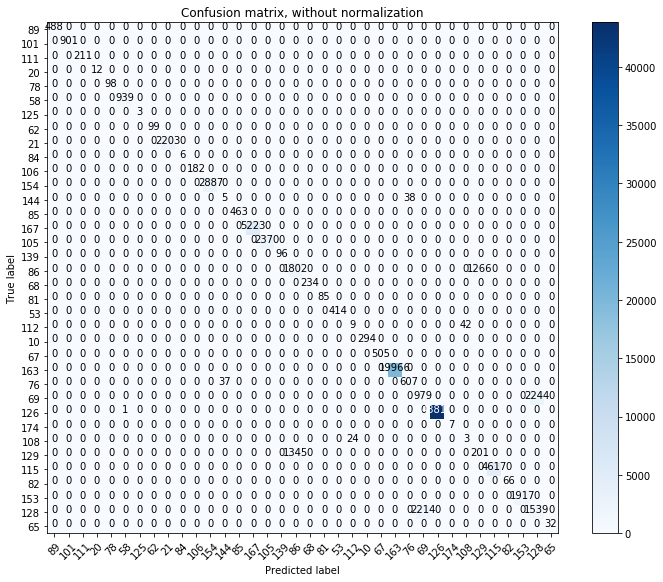

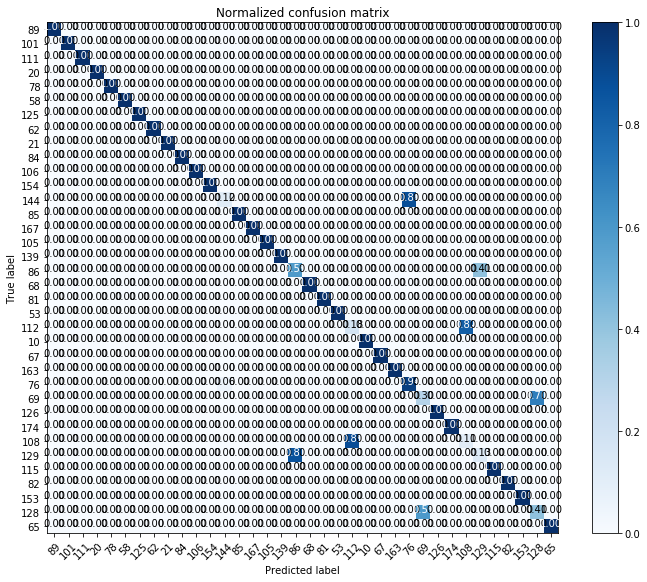

In [28]:
from sklearn.metrics import confusion_matrix
import itertools


class_names = list(data_car['subfolder'].unique())

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_pred_rf, y_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [29]:
for n in data_car['subfolder'].unique():
    print(data_car[data_car['subfolder'] == n].shape)

(15494, 14)
(1063, 14)
(1470, 14)
(4211, 14)
(14352, 14)
(503, 14)
(3294, 14)
(4965, 14)
(1020, 14)
(26181, 14)
(1979, 14)
(279, 14)
(7462, 14)
(11554, 14)
(18969, 14)
(445, 14)
(185, 14)
(478, 14)
(11140, 14)
(207, 14)
(57, 14)
(2464, 14)
(2372, 14)
(456, 14)
(9410, 14)
(939, 14)
(55, 14)
(16055, 14)
(179, 14)
(185, 14)
(43, 14)
(99554, 14)
(2391, 14)
(23331, 14)
(219653, 14)
(22, 14)


In [30]:
X

,velocity,acceleration,v_ave,v_med,v_max,a_ave,a_med,a_max
0,16.108078,-0.588742,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
1,15.519336,-0.419958,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
2,14.679420,-0.007034,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
3,14.665352,0.320263,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
4,15.305877,0.604292,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
5,16.514461,0.498483,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
6,17.511427,0.500494,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
7,18.512415,0.565412,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
8,21.339475,0.073265,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
9,21.705800,-0.130317,8.796890,8.688512,21.705800,-0.031366,-0.032979,1.211086
